# **DataCure Team**

# Project Title: Diabetes Prediction Model Using Health and Demographic Data

## Problem Definition

Diabetes is a growing health concern worldwide, impacting millions of lives and increasing the burden on healthcare systems. Early detection of diabetes can improve patient outcomes and help healthcare providers allocate resources more effectively. This project aims to develop a binary classification model that predicts whether an individual is likely to have diabetes (Yes or No) based on their health data, lifestyle factors, and demographic information.

## Objective

The primary objective of this project is to create a machine learning model that accurately predicts diabetes status using structured health data. The final model will be deployed as a Streamlit web application, allowing users to input patient data and receive instant predictions.


## Dataset Description

The dataset used for this project is obtained from the UCI Repository. It contains health and demographic data of individuals, with each row representing a single person’s record.
Features:
1. **HighBP:** Whether the individual has high blood pressure (1: Yes, 0: No).
2. **HighChol:** Whether the individual has high cholesterol (1: Yes, 0: No).
3. **CholCheck:** Cholesterol check in the last 5 years (1: Yes, 0: No).
4. **BMI:** Body Mass Index (numerical).
5. **Smoker:** Smoking status (1: Smoker, 0: Non-smoker).
6. **Stroke:** History of stroke (1: Yes, 0: No).
7. **HeartDiseaseorAttack:** activity engagement (1: Yes, 0: No).
9. **Fruits:** Frequency of fruit consumption (1: Yes, 0: No).
10. **Veggies:** Frequency of vegetable consumption (1: Yes, 0: No).
11. **HvyAlcoholConsump:** Heavy alcohol consumption status (1: Yes, 0: No).
12. **AnyHealthcare:** Access to healthcare services (1: Yes, 0: No).
13. **NoDocbcCost:** Couldn’t see a doctor due to cost (1: Yes, 0: No).
14. **GenHlth:** General health rating (1: Excellent, ..., 5: Poor).
15. **MentHlth:** Number of days of poor mental health in the past month.
16. **PhysHlth:** Number of days of poor physical health in the past month.
17. **DiffWalk:** Difficulty walking or climbing stairs (1: Yes, 0: No).
18. **Sex:** Biological sex (1: Male, 0: Female).
19. **Age:** Age category (1: 18–24, ..., 13: 80+).
20. **Education:** Education level (1: No high school, ..., 6: College graduate).
21. **Income:** Income level (1: <$10k, ..., 8: $75k+).
22. **Outcome:** Target variable indicating diabetes status (1: Yes, 0: No).


## Data Collection

The dataset was sourced from the UCI Repository. It was downloaded as a CSV file and loaded into Jupyter Noebook for analysis.

#### Laoding the Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#### Loading Dataset

In [16]:
df = pd.read_csv('diabetes.csv')

In [18]:
# checking the head
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [20]:
## checking the tail
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


#### Data Cleaning and Preprocessing

##### Basic structure

In [24]:
# Display general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [27]:
## checking the number of rows and columns 
df.shape

(253680, 22)

In [29]:
# Listing all the columns
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [31]:
# Renaming column
df.rename(columns={'Diabetes_012': 'Outcome'},
          inplace=True, errors='raise')

In [33]:
#  Checking the statistical summary for numerical columns
df.describe()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [35]:
# Checking for missing values
df.isnull().sum()

Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [37]:
# Checking the unique values for each column
for i in df.columns:
    i = df.value_counts(i)
    print(f'\n\n\nvalues of {i}')




values of Outcome
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64



values of HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64



values of HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64



values of CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64



values of BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
86.0        1
90.0        1
91.0        1
78.0        1
96.0        1
Name: count, Length: 84, dtype: int64



values of Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64



values of Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64



values of HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64



values of PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64



values of Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64



values of Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64



values 

In [42]:
# Checking for duplicate rows
df.duplicated().sum()

23899

We have about 23,899 duplicate rows. Hence we will remove them

In [45]:
# Removing duplicate rows
df = df.drop_duplicates()

In [47]:
# Reconfirming if we still have duplicate rows
df.duplicated().sum()

0

In [49]:
# checking the new shape of our data
df.shape

(229781, 22)

After removing the duplicate rows, we now have 229,781 rows and 21 columns

### Exploratory Data Analysis (EDA)

##### Histograms to show distributions

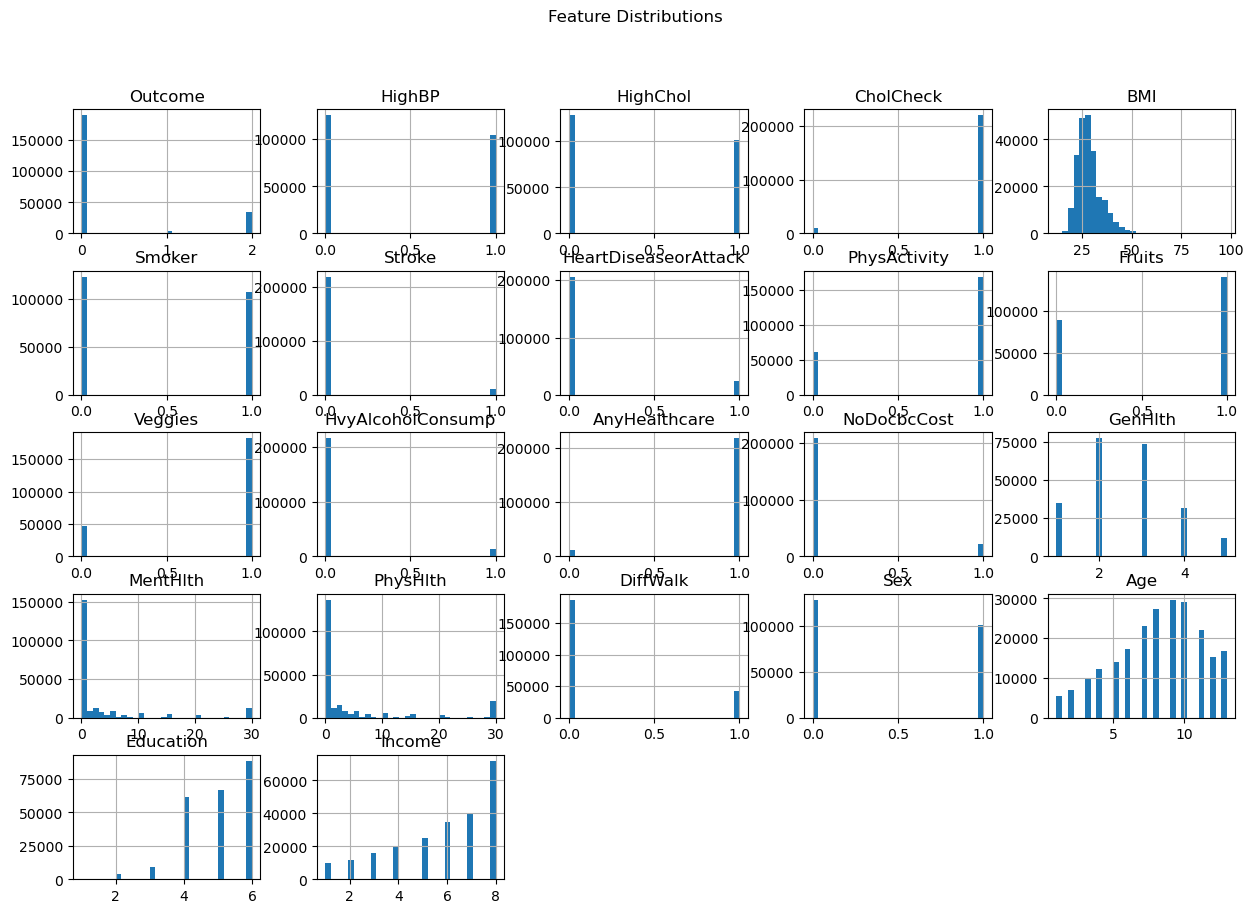

In [54]:
df.hist(bins=30, figsize=(15, 10)) 
plt.suptitle('Feature Distributions') 
plt.savefig("Feature Distribution.png", dpi=300, bbox_inches='tight') # Save the plot 
plt.show()

##### Correlation matrix

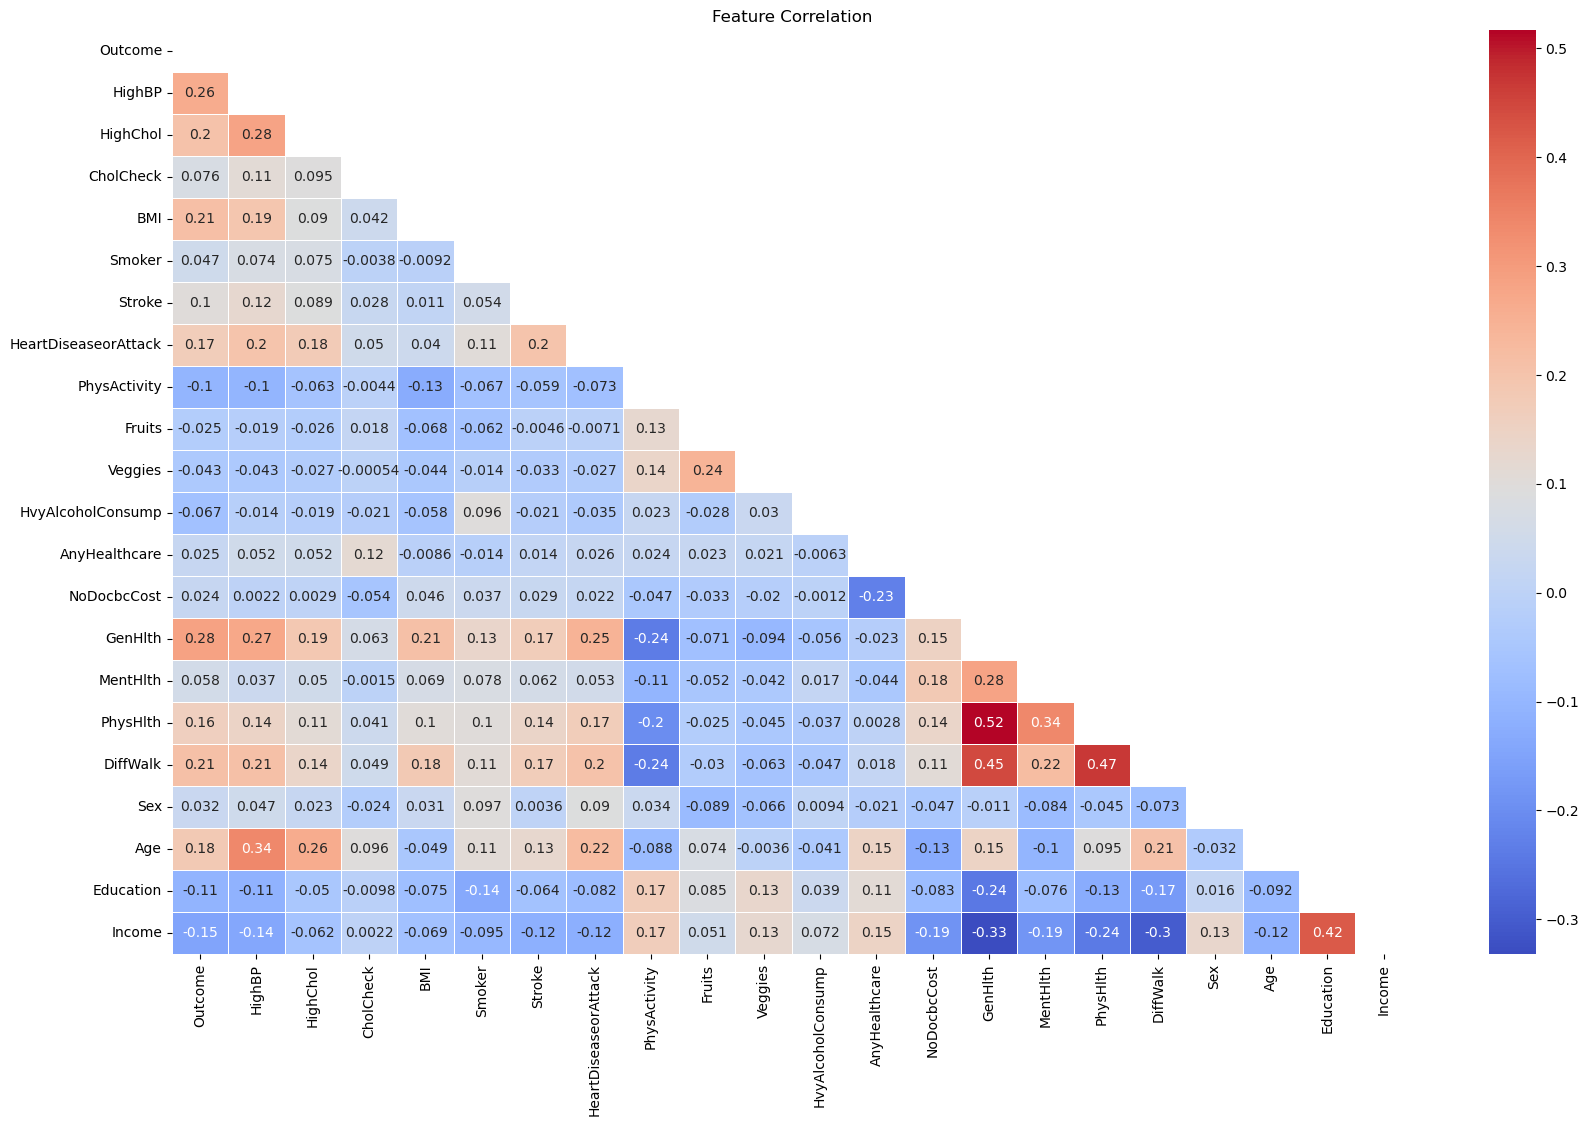

In [57]:
# using the upper triangle matrix as mask 
matrix = np.triu(df.corr())

plt.figure(figsize=(20,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title("Feature Correlation")
plt.savefig("Feature Correlation.png", dpi=300, bbox_inches='tight') # Save the plot 
plt.show()

#### Summary of Correlations with the Target Column (Outcome)
The following columns has a very strong or high correlation with the target columns; HighBP (0.26), BMI (0.21), Age (0.18), GenHlth (0.28), PhysHlth (0.16), HighChol (0.2). While the following column has low correlation with the target variable and hence has low impact in the prediction. They include; Smoker (-0.047), Fruits (-0.025) & Veggies (-0.043), HvyAlcoholConsump (-0.067), Sex (-0.032), AnyHealthcare (0.025).
CholCheck (-0.076): Cholesterol check-ups are weakly related to diabetes.

The following columns could be excluded since they have very low or no correlation with the target variable and are unlikely to impact predictions significantly include:
Smoker
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
Sex
CholCheck

### Feature Engineering

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [63]:
df.head()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [65]:
df.tail()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [67]:
df.columns

Index(['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [69]:
# Prepare features and target
X = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
        'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = df['Outcome']

##### Train-Test Split

In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Model Selection and Building

In [ ]:
#Logistic Regression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Random Forest Classifier
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# Gradient Boosting Classifier
model_3 = GradientBoostingClassifier()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

# Support Vector Classifier (SVC)
model_4 = SVC()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

# Function to print metrics for each model
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

### Model Evaluation

In [ ]:
# Print metrics for Logistic Regression
print_metrics(y_test, y_pred_1, "Logistic Regression")

In [ ]:
# # Print metrics for Random Forest
print_metrics(y_test, y_pred_2, "Random Forest Classifier")

In [ ]:
# Print metrics for Gradient Boosting
print_metrics(y_test, y_pred_3, "Gradient Boosting Classifier")

In [ ]:
# Print metrics for Support vector Machine
print_metrics(y_test, y_pred_4, "Support Vector Classifier")

### Saving the best performing model